In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path,'Train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)
a=data
b = labels


In [55]:
print(a.shape,b.shape)
X_train, X_test, y_train,y_test = train_test_split(data,labels,test_size = 0.2,random_state=42)
y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)
print(a.shape[1:])

(39209, 30, 30, 3) (39209,)
(30, 30, 3)


In [61]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 141s 5ms/step - loss: 2.0353 - accuracy: 0.4837 - val_loss: 0.4894 - val_accuracy: 0.8767
Epoch 2/15
31367/31367 [==============================] - 107s 3ms/step - loss: 0.7522 - accuracy: 0.7741 - val_loss: 0.2441 - val_accuracy: 0.9291
Epoch 3/15
31367/31367 [==============================] - 103s 3ms/step - loss: 0.5586 - accuracy: 0.8333 - val_loss: 0.2318 - val_accuracy: 0.9314
Epoch 4/15
31367/31367 [==============================] - 102s 3ms/step - loss: 0.4513 - accuracy: 0.8663 - val_loss: 0.1569 - val_accuracy: 0.9528
Epoch 5/15
31367/31367 [==============================] - 105s 3ms/step - loss: 0.4065 - accuracy: 0.8770 - val_loss: 0.1362 - val_accuracy: 0.9596
Epoch 6/15
31367/31367 [==============================] - 106s 3ms/step - loss: 0.3724 - accuracy: 0.8899 - val_loss: 0.1699 - val_accuracy: 0.9524
Epoch 7/15
31367/31367 [==============================] - 99s 3

In [62]:
model.save('my_model.h5')

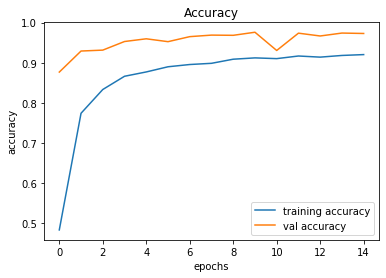

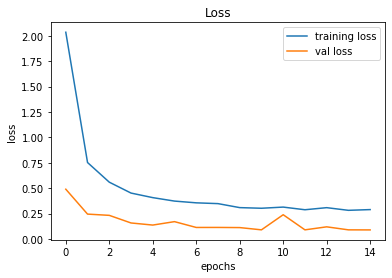

In [63]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()


plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test = np.array(data)

pred = model.predict_classes(X_test)
accuracy_score(labels,pred)

0.9363420427553444

In [28]:
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test = np.array(data)

pred = model.predict_classes(X_test)
accuracy_score(labels,pred)


0.9102929532858274